<a href="https://colab.research.google.com/github/Alfian1706/BD3-kelompok1/blob/main/Analisis_Data_Text_SNBT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# prompt: saya ingin memanggil data SNBT.csv yang telah saya unggah

import pandas as pd

# Ganti 'SNBT.csv' dengan nama file yang sesuai jika berbeda
SNBT = pd.read_csv('SNBT.csv')

# Menampilkan beberapa baris pertama data untuk verifikasi
print(SNBT.head())


   conversation_id_str                      created_at  favorite_count  \
0  1902495593794302210  Wed Mar 19 23:01:10 +0000 2025           10226   
1  1901920875940921752  Tue Mar 18 08:57:33 +0000 2025            2906   
2  1901955823951307070  Tue Mar 18 11:16:19 +0000 2025           24985   
3  1901846459211006029  Tue Mar 18 04:01:45 +0000 2025             107   
4  1901910334908280992  Tue Mar 18 08:15:34 +0000 2025            5080   

                                           full_text               id_str  \
0   TIPS SKOR 750+ SNBT DALAM 1 BULAN Kak aku ga ...  1902495593794302210   
1  2. Belajar sesuai sebaran materi Dalam waktu 1...  1901920899206684935   
2  PENDAFTARAN TRY OUT UTBK SNBT 9 2025 DIBUKA GR...  1901955823951307070   
3  Rumus penting PK PM UTBK SNBT yang wajib kalia...  1901846459211006029   
4  OTW BANTAI UTBK SNBT 800+ OTW BANTAI UTBK SNBT...  1901910334908280992   

                                         image_url in_reply_to_screen_name  \
0  https://pbs

In [2]:
SNBT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   conversation_id_str      200 non-null    int64 
 1   created_at               200 non-null    object
 2   favorite_count           200 non-null    int64 
 3   full_text                200 non-null    object
 4   id_str                   200 non-null    int64 
 5   image_url                172 non-null    object
 6   in_reply_to_screen_name  19 non-null     object
 7   lang                     200 non-null    object
 8   location                 132 non-null    object
 9   quote_count              200 non-null    int64 
 10  reply_count              200 non-null    int64 
 11  retweet_count            200 non-null    int64 
 12  tweet_url                200 non-null    object
 13  user_id_str              200 non-null    int64 
 14  username                 200 non-null    o

**Tahapan Cleaning Data**

In [3]:
SNBT["full_text"]

,full_text
0,TIPS SKOR 750+ SNBT DALAM 1 BULAN Kak aku ga ...
1,2. Belajar sesuai sebaran materi Dalam waktu 1...
2,PENDAFTARAN TRY OUT UTBK SNBT 9 2025 DIBUKA GR...
3,Rumus penting PK PM UTBK SNBT yang wajib kalia...
4,OTW BANTAI UTBK SNBT 800+ OTW BANTAI UTBK SNBT...
...,...
195,[Last Promo Sharing Pahamify 3 Bln] 彡 4 user :...
196,univ! halo ini gmn ya caranya... ada yg tau ga...
197,Soal PPU yg cukup sering keluar: ️ Buat paragr...
198,@bearmacn SAYANGGG semangaat ️‍ bantai di snbt...


In [4]:
#membuat function cleaning

import re
def clean(s):
    s = s.replace(r'<lb>', "\n")
    s = s.replace(r'<tab>', "\i")
    s = re.sub(r'<br */*>', "\n", s)
    s = s.replace("&lt;", "<").replace("&gt;", ">").replace("&amp;", "&")
    s = s.replace("&amp;", "&")
    # markdown urls
    s = re.sub(r'\(https*://[^\)]*\)', "", s)
    # normal urls
    s = re.sub(r'https*://[^\s]*', "", s)
    s = re.sub(r'_+', ' ', s)
    s = re.sub(r'"+', '"', s)
    return str(s)

In [5]:
#membuat sebuah variabel baru untuk menyimpan data hasil cleaning

SNBT["text_clean"] = ''

In [6]:
#Pembersihan text dari symbol
for i, row in SNBT.iterrows():
    SNBT.at[i, "text_clean"] = clean(row.full_text)

In [7]:
SNBT.head()

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username,text_clean
0,1902495593794302210,Wed Mar 19 23:01:10 +0000 2025,10226,TIPS SKOR 750+ SNBT DALAM 1 BULAN Kak aku ga ...,1902495593794302210,https://pbs.twimg.com/media/GmcFqAQa4AEzsrA.jpg,NaN,in,"DKI Jakarta, Indonesia",17,9,1920,https://x.com/studytipsntrik/status/1902495593...,1431851630652125190,studytipsntrik,TIPS SKOR 750+ SNBT DALAM 1 BULAN Kak aku ga ...
1,1901920875940921752,Tue Mar 18 08:57:33 +0000 2025,2906,2. Belajar sesuai sebaran materi Dalam waktu 1...,1901920899206684935,https://pbs.twimg.com/media/GmT4RBbbYAAzpVZ.png,ahnafau,in,Bandung-Jakarta,4,2,626,https://x.com/ahnafau/status/1901920899206684935,1250114172345405441,ahnafau,2. Belajar sesuai sebaran materi Dalam waktu 1...
2,1901955823951307070,Tue Mar 18 11:16:19 +0000 2025,24985,PENDAFTARAN TRY OUT UTBK SNBT 9 2025 DIBUKA GR...,1901955823951307070,https://pbs.twimg.com/media/GmUafIhbQAM2Zp4.jpg,NaN,in,NaN,320,415,24693,https://x.com/sainsinaja/status/19019558239513...,1147705432628088832,sainsinaja,PENDAFTARAN TRY OUT UTBK SNBT 9 2025 DIBUKA GR...
3,1901846459211006029,Tue Mar 18 04:01:45 +0000 2025,107,Rumus penting PK PM UTBK SNBT yang wajib kalia...,1901846459211006029,https://pbs.twimg.com/media/GmS3RS3akAAH9Wg.jpg,NaN,in,NaN,1,0,33,https://x.com/quimicaorgarsi/status/1901846459...,1274566360643731456,quimicaorgarsi,Rumus penting PK PM UTBK SNBT yang wajib kalia...
4,1901910334908280992,Tue Mar 18 08:15:34 +0000 2025,5080,OTW BANTAI UTBK SNBT 800+ OTW BANTAI UTBK SNBT...,1901910334908280992,NaN,NaN,in,Jakarta,36,11,2221,https://x.com/utbkcak/status/1901910334908280992,1304292109470498816,utbkcak,OTW BANTAI UTBK SNBT 800+ OTW BANTAI UTBK SNBT...


In [8]:
SNBT[["full_text", "text_clean"]].head()

,full_text,text_clean
0,TIPS SKOR 750+ SNBT DALAM 1 BULAN Kak aku ga ...,TIPS SKOR 750+ SNBT DALAM 1 BULAN Kak aku ga ...
1,2. Belajar sesuai sebaran materi Dalam waktu 1...,2. Belajar sesuai sebaran materi Dalam waktu 1...
2,PENDAFTARAN TRY OUT UTBK SNBT 9 2025 DIBUKA GR...,PENDAFTARAN TRY OUT UTBK SNBT 9 2025 DIBUKA GR...
3,Rumus penting PK PM UTBK SNBT yang wajib kalia...,Rumus penting PK PM UTBK SNBT yang wajib kalia...
4,OTW BANTAI UTBK SNBT 800+ OTW BANTAI UTBK SNBT...,OTW BANTAI UTBK SNBT 800+ OTW BANTAI UTBK SNBT...


NLTK Process

In [9]:
pip install nltk

In [10]:
#tokenisasi
import nltk
nltk.download('punkt_tab')
from nltk.tokenize import sent_tokenize,word_tokenize

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [11]:
#Contoh tokenisasi
example_text = "Hello there, how are you doing today? The weather is great today. The sky is blue. python is awsome"
print(sent_tokenize(example_text))
print(word_tokenize(example_text))

['Hello there, how are you doing today?', 'The weather is great today.', 'The sky is blue.', 'python is awsome']
['Hello', 'there', ',', 'how', 'are', 'you', 'doing', 'today', '?', 'The', 'weather', 'is', 'great', 'today', '.', 'The', 'sky', 'is', 'blue', '.', 'python', 'is', 'awsome']


In [12]:
# prompt: saya ingin melakukan tokenisasi seperi syntax 23 untuk SNBT["text_clean"]

# Tokenisasi kata pada kolom 'text_clean'
SNBT['tokenized_text'] = SNBT['text_clean'].apply(lambda x: word_tokenize(x))

# Menampilkan beberapa baris pertama data dengan kolom tokenized_text
print(SNBT[['text_clean', 'tokenized_text']].head())


                                          text_clean  \
0   TIPS SKOR 750+ SNBT DALAM 1 BULAN Kak aku ga ...   
1  2. Belajar sesuai sebaran materi Dalam waktu 1...   
2  PENDAFTARAN TRY OUT UTBK SNBT 9 2025 DIBUKA GR...   
3  Rumus penting PK PM UTBK SNBT yang wajib kalia...   
4  OTW BANTAI UTBK SNBT 800+ OTW BANTAI UTBK SNBT...   

                                      tokenized_text  
0  [TIPS, SKOR, 750+, SNBT, DALAM, 1, BULAN, Kak,...  
1  [2, ., Belajar, sesuai, sebaran, materi, Dalam...  
2  [PENDAFTARAN, TRY, OUT, UTBK, SNBT, 9, 2025, D...  
3  [Rumus, penting, PK, PM, UTBK, SNBT, yang, waj...  
4  [OTW, BANTAI, UTBK, SNBT, 800+, OTW, BANTAI, U...  


In [13]:
SNBT["tokenized_text"].head()

,tokenized_text
0,"[TIPS, SKOR, 750+, SNBT, DALAM, 1, BULAN, Kak,..."
1,"[2, ., Belajar, sesuai, sebaran, materi, Dalam..."
2,"[PENDAFTARAN, TRY, OUT, UTBK, SNBT, 9, 2025, D..."
3,"[Rumus, penting, PK, PM, UTBK, SNBT, yang, waj..."
4,"[OTW, BANTAI, UTBK, SNBT, 800+, OTW, BANTAI, U..."


In [14]:
# prompt: saya ingin mengambil stopwords dalam bahasa indonesia

import nltk
nltk.download('stopwords')

# Mendapatkan daftar stopwords dalam bahasa Indonesia
from nltk.corpus import stopwords
stop_words_indonesia = stopwords.words('indonesian')

stop_words_indonesia


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['ada',
 'adalah',
 'adanya',
 'adapun',
 'agak',
 'agaknya',
 'agar',
 'akan',
 'akankah',
 'akhir',
 'akhiri',
 'akhirnya',
 'aku',
 'akulah',
 'amat',
 'amatlah',
 'anda',
 'andalah',
 'antar',
 'antara',
 'antaranya',
 'apa',
 'apaan',
 'apabila',
 'apakah',
 'apalagi',
 'apatah',
 'artinya',
 'asal',
 'asalkan',
 'atas',
 'atau',
 'ataukah',
 'ataupun',
 'awal',
 'awalnya',
 'bagai',
 'bagaikan',
 'bagaimana',
 'bagaimanakah',
 'bagaimanapun',
 'bagi',
 'bagian',
 'bahkan',
 'bahwa',
 'bahwasanya',
 'baik',
 'bakal',
 'bakalan',
 'balik',
 'banyak',
 'bapak',
 'baru',
 'bawah',
 'beberapa',
 'begini',
 'beginian',
 'beginikah',
 'beginilah',
 'begitu',
 'begitukah',
 'begitulah',
 'begitupun',
 'bekerja',
 'belakang',
 'belakangan',
 'belum',
 'belumlah',
 'benar',
 'benarkah',
 'benarlah',
 'berada',
 'berakhir',
 'berakhirlah',
 'berakhirnya',
 'berapa',
 'berapakah',
 'berapalah',
 'berapapun',
 'berarti',
 'berawal',
 'berbagai',
 'berdatangan',
 'beri',
 'berikan',
 'berikut'

In [15]:
from nltk.corpus import stopwords
text = 'he is a good boy. he is very good in coding'
text = word_tokenize(text)
text_with_no_stopwords = [word for word in text if word not in stopwords.words('english')]
text_with_no_stopwords

['good', 'boy', '.', 'good', 'coding']

In [16]:
# prompt: saya ingin melakukan stopwords di SNBT["tokenized_text"]

# Mendapatkan daftar stopwords dalam bahasa Indonesia
stop_words_indonesia = stopwords.words('indonesian')

# Fungsi untuk menghapus stopwords dari list token
def remove_stopwords(token_list):
  return [word for word in token_list if word.lower() not in stop_words_indonesia]

# Menerapkan fungsi remove_stopwords ke kolom 'tokenized_text'
SNBT['tokenized_stopwords'] = SNBT['tokenized_text'].apply(remove_stopwords)

# Menampilkan beberapa baris pertama data dengan kolom tokenized_text_no_stopwords
SNBT[['tokenized_text', 'tokenized_stopwords']].head()


,tokenized_text,tokenized_stopwords
0,"[TIPS, SKOR, 750+, SNBT, DALAM, 1, BULAN, Kak,...","[TIPS, SKOR, 750+, SNBT, 1, Kak, ga, lolos, SN..."
1,"[2, ., Belajar, sesuai, sebaran, materi, Dalam...","[2, ., Belajar, sesuai, sebaran, materi, 1, bu..."
2,"[PENDAFTARAN, TRY, OUT, UTBK, SNBT, 9, 2025, D...","[PENDAFTARAN, TRY, OUT, UTBK, SNBT, 9, 2025, D..."
3,"[Rumus, penting, PK, PM, UTBK, SNBT, yang, waj...","[Rumus, PK, PM, UTBK, SNBT, wajib, pelajari]"
4,"[OTW, BANTAI, UTBK, SNBT, 800+, OTW, BANTAI, U...","[OTW, BANTAI, UTBK, SNBT, 800+, OTW, BANTAI, U..."


Stemming

In [17]:
#Contoh Stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()    ## Creating an object for porterstemmer
example_words = ['earn',"earning","earned","earns"]  ##Example words
for w in example_words:
    print(ps.stem(w))

earn
earn
earn
earn


In [18]:
# prompt: saya ingin melakukan stemming pada SNBT["tokenized_stopwords"] dalam bahasa indonesia

!pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 5.5 MB/s eta 0:00:00


In [19]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Buat objek stemmer Sastrawi
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Fungsi untuk melakukan stemming pada list token
def stemming_sastrawi(token_list):
  return [stemmer.stem(word) for word in token_list]

# Terapkan fungsi stemming_sastrawi ke kolom 'tokenized_stopwords'
SNBT['stemmed_words'] = SNBT['tokenized_stopwords'].apply(stemming_sastrawi)

# Menampilkan beberapa baris pertama data dengan kolom stemmed_words
SNBT[['tokenized_stopwords', 'stemmed_words']]

,tokenized_stopwords,stemmed_words
0,"[TIPS, SKOR, 750+, SNBT, 1, Kak, ga, lolos, SN...","[tips, skor, 750, snbt, 1, kak, ga, lolos, snb..."
1,"[2, ., Belajar, sesuai, sebaran, materi, 1, bu...","[2, , ajar, sesuai, sebar, materi, 1, buang, c..."
2,"[PENDAFTARAN, TRY, OUT, UTBK, SNBT, 9, 2025, D...","[daftar, try, out, utbk, snbt, 9, 2025, buka, ..."
3,"[Rumus, PK, PM, UTBK, SNBT, wajib, pelajari]","[rumus, pk, pm, utbk, snbt, wajib, ajar]"
4,"[OTW, BANTAI, UTBK, SNBT, 800+, OTW, BANTAI, U...","[otw, bantai, utbk, snbt, 800, otw, bantai, ut..."
...,...,...
195,"[[, Last, Promo, Sharing, Pahamify, 3, Bln, ],...","[, last, promo, sharing, pahamify, 3, bln, , ,..."
196,"[univ, !, halo, gmn, ya, ..., yg, tau, gaa, ?,...","[univ, , halo, gmn, ya, , yg, tau, gaa, , maka..."
197,"[PPU, yg, :, ️, paragraf, yg, padu, ️, Kalimat...","[ppu, yg, , , paragraf, yg, padu, , kalimat, l..."
198,"[@, bearmacn, SAYANGGG, semangaat, ️‍, bantai,...","[, bearmacn, sayanggg, semangaat, , bantai, snbt]"


In [20]:
# prompt: berikan saya syntax untuk membuat analisis sentimen untuk variabel stemmed_words

!pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 4.8 MB/s eta 0:00:00


In [21]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Inisialisasi objek SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

def analyze_sentiment(text_list):
    # Gabungkan list token menjadi satu string
    text = " ".join(text_list)

    # Lakukan analisis sentimen
    scores = analyzer.polarity_scores(text)

    # Kembalikan nilai compound score
    return scores['compound']

# Terapkan fungsi analyze_sentiment ke kolom 'stemmed_words'
SNBT['sentiment_score'] = SNBT['stemmed_words'].apply(analyze_sentiment)

In [22]:
# Menampilkan beberapa baris pertama data dengan kolom sentiment_score
print(SNBT[['stemmed_words', 'sentiment_score']].head())


                                       stemmed_words  sentiment_score
0  [tips, skor, 750, snbt, 1, kak, ga, lolos, snb...          -0.0516
1  [2, , ajar, sesuai, sebar, materi, 1, buang, c...           0.6597
2  [daftar, try, out, utbk, snbt, 9, 2025, buka, ...           0.5423
3           [rumus, pk, pm, utbk, snbt, wajib, ajar]           0.0000
4  [otw, bantai, utbk, snbt, 800, otw, bantai, ut...           0.0000


In [23]:
# Membuat label setiap komentar

# Fungsi untuk menentukan label sentimen berdasarkan sentiment_score
def label_sentiment(score):
    if score < 0:
        return 'negatif'
    elif score == 0:
        return 'netral'
    else:
        return 'positif'

# Buat kolom baru 'sentiment_label' berdasarkan kolom 'sentiment_score'
SNBT['sentiment_label'] = SNBT['sentiment_score'].apply(label_sentiment)

# Menampilkan beberapa baris pertama data dengan kolom sentiment_label
print(SNBT[['stemmed_words', 'sentiment_score', 'sentiment_label']].head())


                                       stemmed_words  sentiment_score  \
0  [tips, skor, 750, snbt, 1, kak, ga, lolos, snb...          -0.0516   
1  [2, , ajar, sesuai, sebar, materi, 1, buang, c...           0.6597   
2  [daftar, try, out, utbk, snbt, 9, 2025, buka, ...           0.5423   
3           [rumus, pk, pm, utbk, snbt, wajib, ajar]           0.0000   
4  [otw, bantai, utbk, snbt, 800, otw, bantai, ut...           0.0000   

  sentiment_label  
0         negatif  
1         positif  
2         positif  
3          netral  
4          netral  


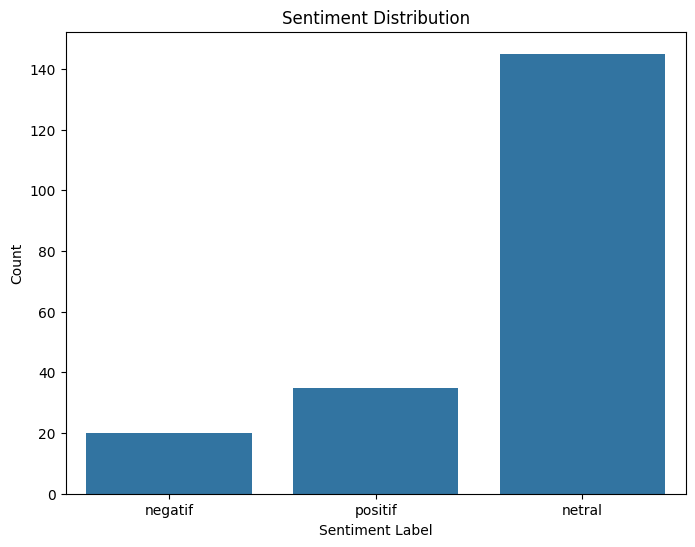

In [24]:
#Membuat grafik plot
import matplotlib.pyplot as plt
import seaborn as sns

# Create the bar chart
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment_label', data=SNBT)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Label')
plt.ylabel('Count')
plt.show()


In [25]:
# prompt: Buat word cloud dari setiap kategori

!pip install wordcloud

from wordcloud import WordCloud
import matplotlib.pyplot as plt

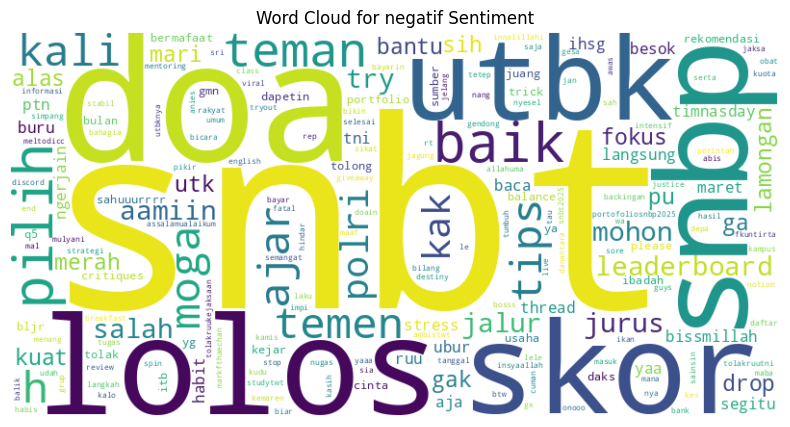

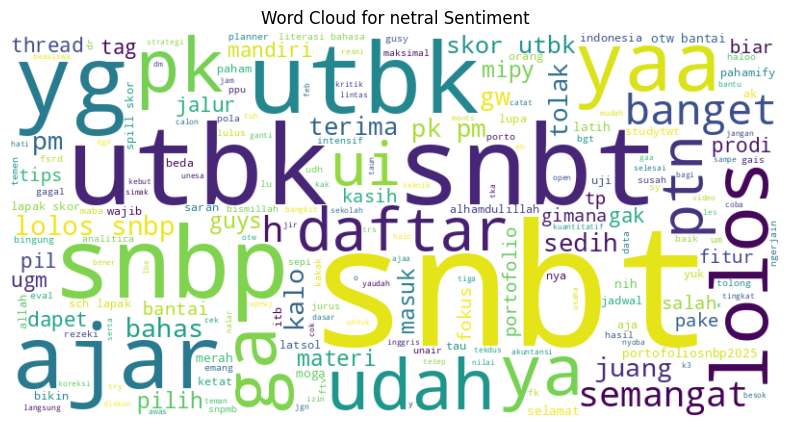

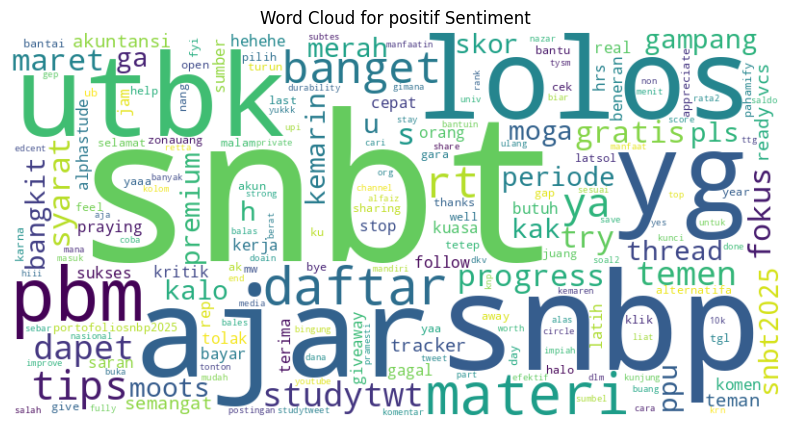

In [26]:

# Group data by sentiment label
sentiment_groups = SNBT.groupby('sentiment_label')

# Create word clouds for each sentiment category
for sentiment, group in sentiment_groups:
    # Combine all stemmed words in the group
    all_words = ' '.join([' '.join(words) for words in group['stemmed_words']])

    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

    # Display the generated image:
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f'Word Cloud for {sentiment} Sentiment')
    plt.show()


Membuat Model Mechine Learning Untuk Memprediksi Sentimen